In [37]:
%matplotlib inline

import nilearn
from nilearn import plotting
from nilearn.masking import compute_background_mask
from nilearn.masking import new_img_like, apply_mask, unmask
import nibabel as nib
import numpy as np

mniT1 =  'MNI152_T1_2mm_brain.nii.gz'
mask_img = compute_background_mask('brainmask_avg.nii.gz')

In [43]:
# Brainmask

masked_data = apply_mask('brainmask_avg.nii.gz', mask_img)
masked_nifti = unmask(masked_data, mask_img, order='F')

plotting.plot_stat_map(masked_nifti, bg_img = mniT1, 
                       cut_coords=range(-80,60,20), draw_cross=False, vmax=np.max(masked_data), threshold=np.min(masked_data),
                       black_bg=False, cmap='jet', alpha=0.7, display_mode='y', output_file="mask_y.pdf")
                       #output_file="sig_left.pdf")
    
plotting.plot_stat_map(masked_nifti, bg_img = mniT1, 
                       cut_coords=range(-40,41,20), draw_cross=False, vmax=np.max(masked_data), threshold=np.min(masked_data),
                       black_bg=False, cmap='jet', alpha=0.7, display_mode='x', output_file="mask_x.pdf")

In [44]:
# TSNR

masked_data = apply_mask('tsnr_avg.nii.gz', mask_img)
masked_nifti = unmask(masked_data, mask_img, order='F')

plotting.plot_stat_map(masked_nifti, bg_img = mniT1, 
                       cut_coords=range(-80,60,20), draw_cross=False, vmax=np.max(masked_data), threshold=np.min(masked_data),
                       black_bg=False, cmap='jet', alpha=0.7, display_mode='y', output_file="tsnr_y.pdf")
                       
    
plotting.plot_stat_map(masked_nifti, bg_img = mniT1, 
                       cut_coords=range(-40,41,20), draw_cross=False, vmax=np.max(masked_data), threshold=np.min(masked_data),
                       black_bg=False, cmap='jet', alpha=0.7, display_mode='x', output_file="tsnr_x.pdf")

plotting.plot_stat_map(masked_nifti, bg_img = mniT1, 
                       cut_coords=range(-40,61,20), draw_cross=False, vmax=np.max(masked_data), threshold=np.min(masked_data),
                       black_bg=False, cmap='jet', alpha=0.7, display_mode='z', output_file="tsnr_z.pdf")

In [50]:
# concatenate pdf files
from wand.image import Image as WImage

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /Library/TeX/texbin/pdfjam --suffix nup --nup '2x1' --landscape --nup '1x2' --outfile mask.pdf -- mask_y.pdf - mask_x.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'mask.pdf'.


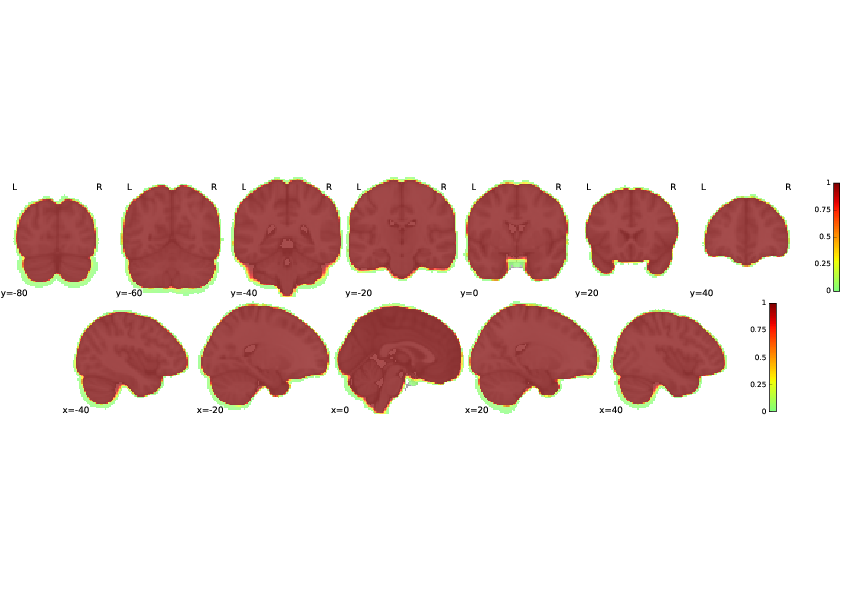

In [51]:
!pdfnup mask_y.pdf mask_x.pdf --nup 1x2 --outfile mask.pdf
WImage(filename='mask.pdf')

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /Library/TeX/texbin/pdfjam --suffix nup --nup '2x1' --landscape --nup '1x3' --outfile tsnr.pdf -- tsnr_y.pdf - tsnr_x.pdf - tsnr_z.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'tsnr.pdf'.


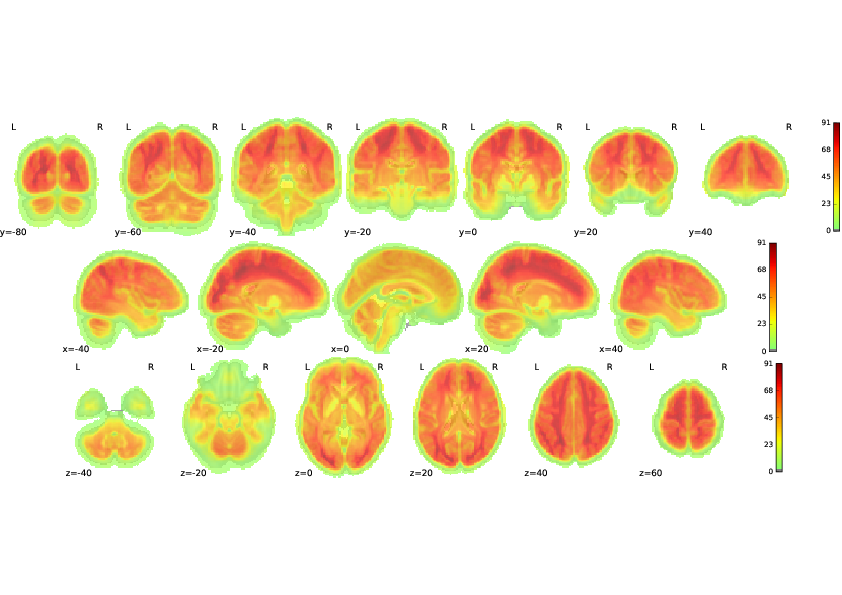

In [52]:
!pdfnup tsnr_y.pdf tsnr_x.pdf tsnr_z.pdf --nup 1x3 --outfile tsnr.pdf
WImage(filename='tsnr.pdf')